## Visualizing Augmentations

In order to see if augmentations actually make sense for the dataset at hand, it is often helpful to visualize the augmentations. For that, we supply two visualization functions:

1. Single Image Comparison: This functions plots the original image and the augmented image side by side. 
2. Augmentation Grid: This function takes a dictionary containing augmentations and plots them in a grid alongside the original image for both PACS and the corruptions provided by the MedMNIST-C API (di Salvo, Doerrich & Ledig (2024)) for the PathMNIST dataset.

**Note:** *It is important to note, that the last step in each augmentation is the transformation into a `torch.Tensor`.*

In [1]:
from domgen.augment import plot_single_augmented, plot_augmented_grid, get_examples
from medmnistc.corruptions.registry import CORRUPTIONS_DS

image_path = '../assets/imgs/cat.jpeg'
augmentations = get_examples("custom") # defines and returns a dictionary of example augmentations.
print(augmentations.keys())

C:\Users\erik\PycharmProjects\domainGeneralization\.venv\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.24). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


dict_keys(['ColorJitter + Rotate + H.Flip', 'HueSaturation + GridDistortion + Transpose', 'CLAHE + RandomResizedCrop + Transpose', 'GaussNoise + Rotate + H.Flip', 'Defocus + ColorJitter + H.Flip', 'Solarize + GridDropout + HueSaturation', 'XY Mask + GaussNoise + Rotate', 'GridDistortion + Defocus + Transpose', 'Solarize + XY Mask + Rotate'])


## Plot a Single Image

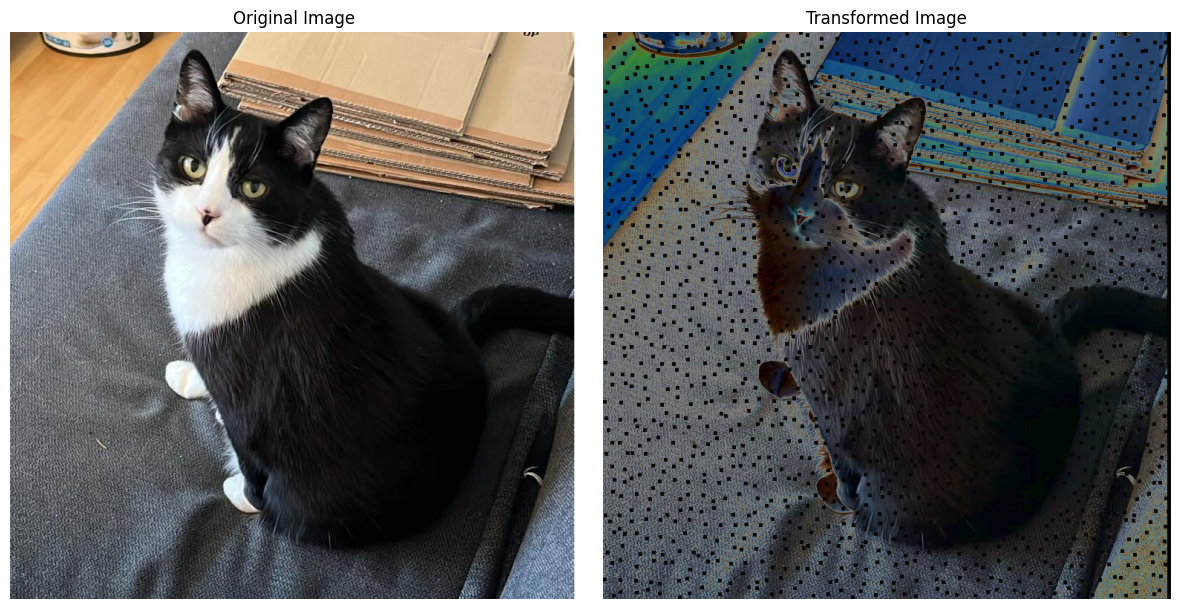

In [2]:
plot_single_augmented(image_path, augmentations['Solarize + GridDropout + HueSaturation'])

## Plot a Grid of Images

Applies all augmentations from the dictionary and displays the resulting transformed images in a grid.

<details>
<summary>His name</summary>
... is Milow :)
</details>


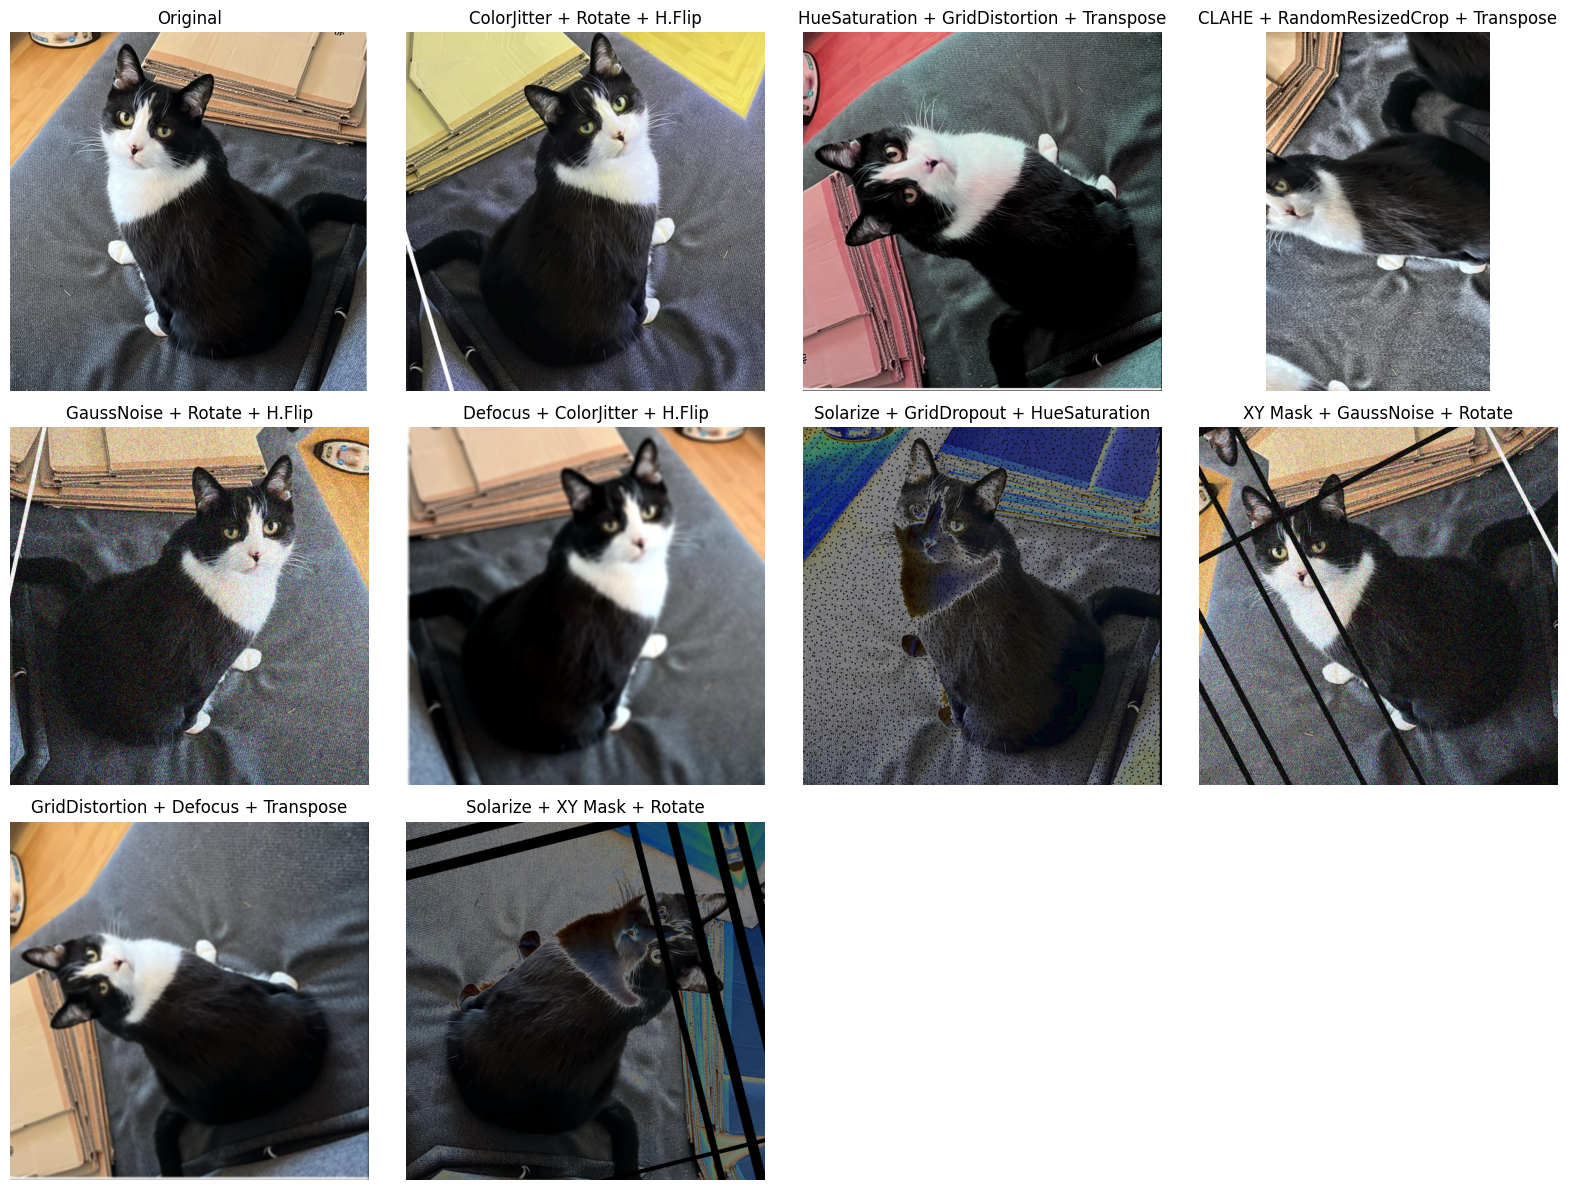

In [2]:
plot_augmented_grid(image_path, augmentations, grid_cols=4)

## Visualizing the Handcrafted PACS Augmentations

{0: 'dog', 1: 'elephant', 2: 'giraffe', 3: 'guitar', 4: 'horse', 5: 'house', 6: 'person'}


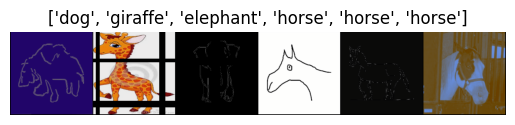

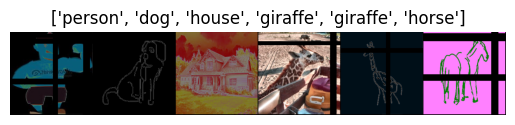

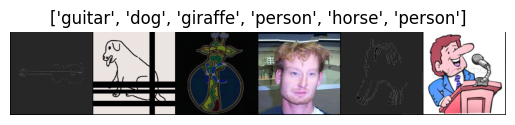

In [4]:
from domgen.data import PACS
from domgen.augment import pacs_aug, denormalize
from domgen.augment._utils import create_augmentation_pipeline
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

augment = create_augmentation_pipeline(pacs_aug)
data = PACS(root='../datasets/', test_domain=0, augment=augment)

train, val, test = data.generate_loaders(batch_size=6)

idx_to_class = data.idx_to_class
print(idx_to_class)

def show(img, label):
    fig = plt.figure()
    plt.axis('off')
    plt.imshow(img.permute(1,2,0))
    plt.title(label)

for i in range(3):
    images, labels = next(iter(train))
    images = [denormalize(img, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) for img in images]
    grid = make_grid(images, scale_each=True)
    labels = [idx_to_class[label.item()] for label in labels]
    show(grid, labels)

## Plot MedMNIST-C Corruptions

The next cell displays the corruptions defined by di Salvo et al. (2024) for the histopathology portion of the MedMNIST-C dataset with a severity of 3.

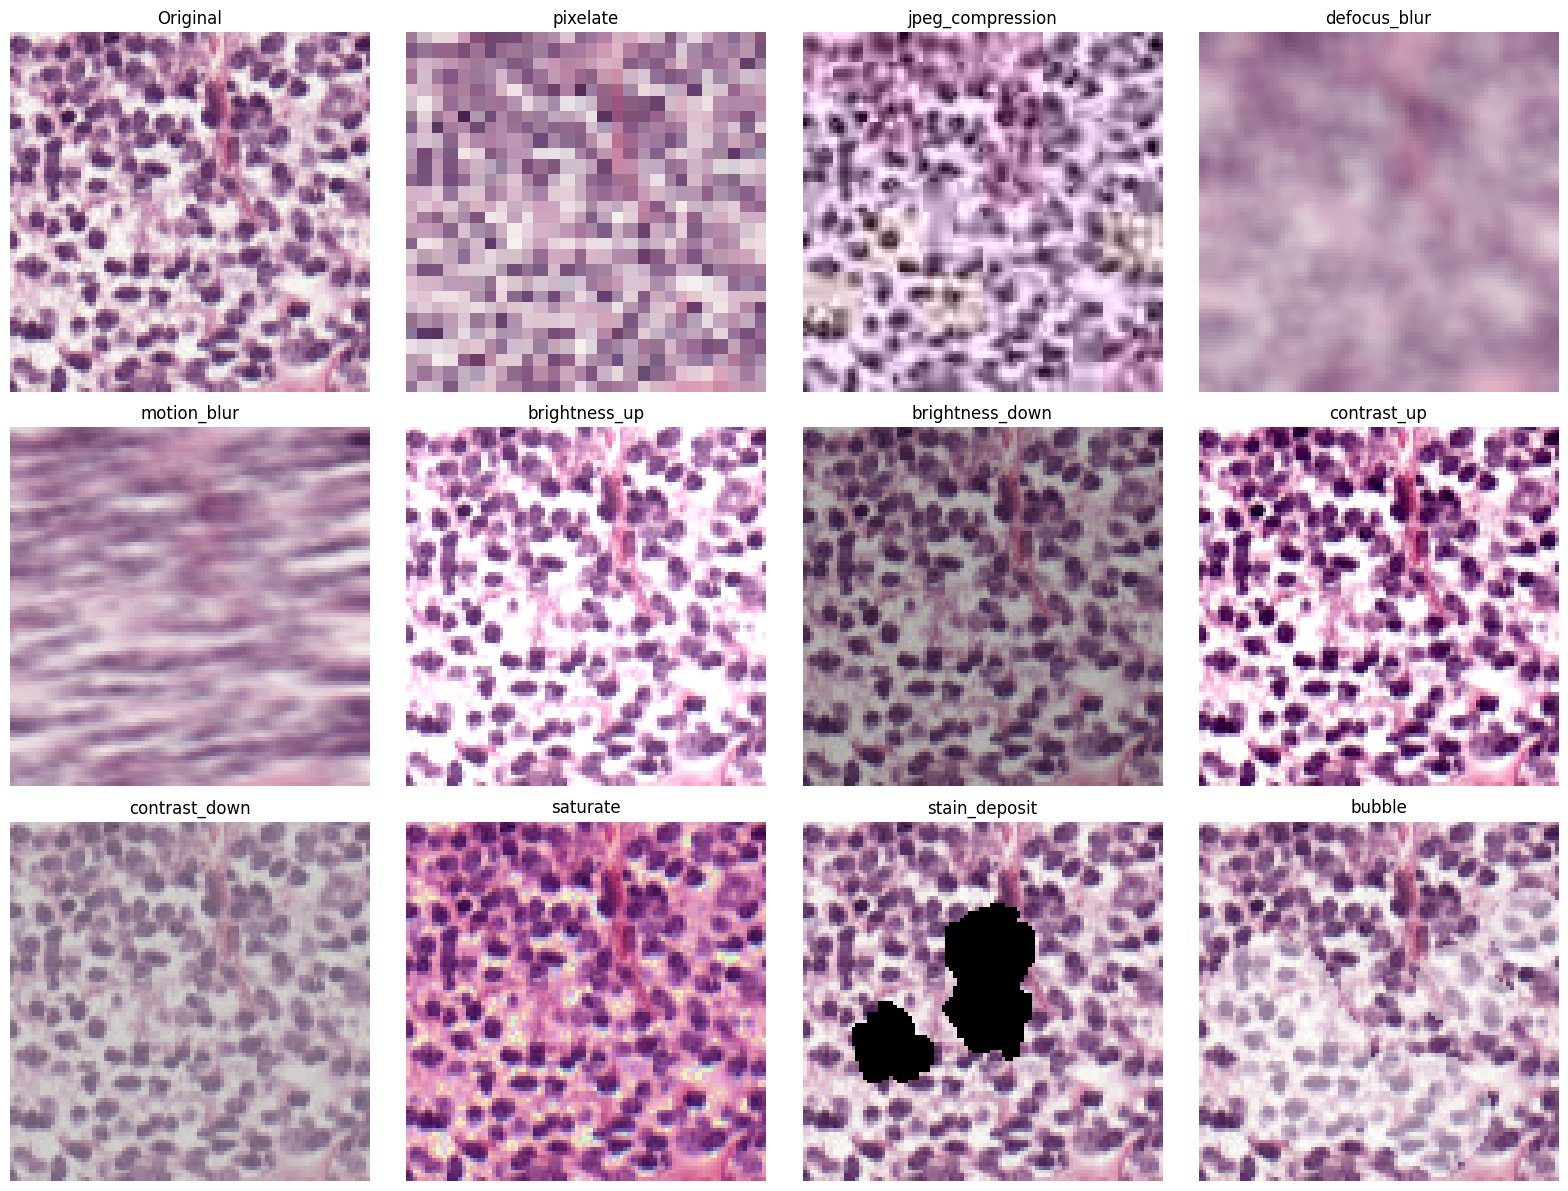

In [3]:
img_path = "../assets/imgs/camelyon17_ex.png"
pathmnist_corruptions = CORRUPTIONS_DS.get('pathmnist', {})
plot_augmented_grid(img_path, pathmnist_corruptions, 4)